In [34]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [35]:
def calculate_energy_consumption(data):
    """
    Calculate used energy in W(att)s(econds)
    :param data: dataframe with timestamps in UNIX time format and power values in Watt 
    :return: Energy
    """
    total_energy = 0.0
    total_time = 0.0
    for i in range(len(data) - 1):
        timestamp1, power1, _ = data.iloc[i]
        timestamp2, power2, total_time = data.iloc[i + 1]

        # Calculate time difference in seconds
        time_difference = timestamp2 - timestamp1

        # Calculate energy consumed during this interval
        # by using the average power between start and end point
        energy_interval = ((power1 + power2) / 2) * time_difference

        # Add energy consumed during this interval to the total energy
        total_energy += energy_interval

    return total_energy, total_time

In [36]:
# TPU std
tpu_std_vgg16 = pd.read_csv('power_measurement_vgg16_100img_tpu_std.csv')
tpu_std_energy_vgg16, tpu_std_time_vgg16 = calculate_energy_consumption(tpu_std_vgg16)

tpu_std_resnet50 = pd.read_csv('power_measurement_resnet50_100img_tpu_std.csv')
tpu_std_energy_resnet50, tpu_std_time_resnet50 = calculate_energy_consumption(tpu_std_resnet50)

tpu_std_mobilenetv2 = pd.read_csv('power_measurement_mobilenetv2_100img_tpu_std.csv')
tpu_std_energy_mobilenetv2, tpu_std_time_mobilenetv2 = calculate_energy_consumption(tpu_std_mobilenetv2)

# TPU max
tpu_max_vgg16 = pd.read_csv('power_measurement_vgg16_100img_tpu_max.csv')
tpu_max_energy_vgg16, tpu_max_time_vgg16 = calculate_energy_consumption(tpu_max_vgg16)

tpu_max_resnet50 = pd.read_csv('power_measurement_resnet50_100img_tpu_max.csv')
tpu_max_energy_resnet50, tpu_max_time_resnet50 = calculate_energy_consumption(tpu_max_resnet50)

tpu_max_mobilenetv2 = pd.read_csv('power_measurement_mobilenetv2_100img_tpu_max.csv')
tpu_max_energy_mobilenetv2, tpu_max_time_mobilenetv2 = calculate_energy_consumption(tpu_max_mobilenetv2)

# CPU 1500
cpu_std_vgg16 = pd.read_csv('power_measurement_vgg16_100img_cpu.csv')
cpu_std_energy_vgg16, cpu_std_time_vgg16 = calculate_energy_consumption(cpu_std_vgg16)

cpu_std_resnet50 = pd.read_csv('power_measurement_resnet50_100img_cpu.csv')
cpu_std_energy_resnet50, cpu_std_time_resnet50 = calculate_energy_consumption(cpu_std_resnet50)

cpu_std_mobilenetv2 = pd.read_csv('power_measurement_mobilenetv2_100img_cpu.csv')
cpu_std_energy_mobilenetv2, cpu_std_time_mobilenetv2 = calculate_energy_consumption(cpu_std_mobilenetv2)

# CPU 1900
cpu_max_vgg16 = pd.read_csv('power_measurement_vgg16_100img_cpu_1900.csv')
cpu_max_energy_vgg16, cpu_max_time_vgg16 = calculate_energy_consumption(cpu_max_vgg16)

cpu_max_resnet50 = pd.read_csv('power_measurement_resnet50_100img_cpu_1900.csv')
cpu_max_energy_resnet50, cpu_max_time_resnet50 = calculate_energy_consumption(cpu_max_resnet50)

cpu_max_mobilenetv2 = pd.read_csv('power_measurement_mobilenetv2_100img_cpu_1900.csv')
cpu_max_energy_mobilenetv2, cpu_max_time_mobilenetv2 = calculate_energy_consumption(cpu_max_mobilenetv2)

In [37]:
data = [['VGG16', 'CPU', 'std', 'time', cpu_std_time_vgg16], ['VGG16', 'CPU', 'std', 'energy', cpu_std_energy_vgg16],
        ['VGG16', 'CPU', 'max', 'time', cpu_max_time_vgg16], ['VGG16', 'CPU', 'max', 'energy', cpu_max_energy_vgg16],
        ['VGG16', 'TPU', 'std', 'time', tpu_std_time_vgg16], ['VGG16', 'TPU', 'std', 'energy', tpu_std_energy_vgg16],
        ['VGG16', 'TPU', 'max', 'time', tpu_max_time_vgg16], ['VGG16', 'TPU', 'max', 'energy', tpu_max_energy_vgg16],

        ['ResNet50', 'CPU', 'std', 'time', cpu_std_time_resnet50],
        ['ResNet50', 'CPU', 'std', 'energy', cpu_std_energy_resnet50],
        ['ResNet50', 'CPU', 'max', 'time', cpu_max_time_resnet50],
        ['ResNet50', 'CPU', 'max', 'energy', cpu_max_energy_resnet50],
        ['ResNet50', 'TPU', 'std', 'time', tpu_std_time_resnet50],
        ['ResNet50', 'TPU', 'std', 'energy', tpu_std_energy_resnet50],
        ['ResNet50', 'TPU', 'max', 'time', tpu_max_time_resnet50],
        ['ResNet50', 'TPU', 'max', 'energy', tpu_max_energy_resnet50],

        ['MobileNetV2', 'CPU', 'std', 'time', cpu_std_time_mobilenetv2],
        ['MobileNetV2', 'CPU', 'std', 'energy', cpu_std_energy_mobilenetv2],
        ['MobileNetV2', 'CPU', 'max', 'time', cpu_max_time_mobilenetv2],
        ['MobileNetV2', 'CPU', 'max', 'energy', cpu_max_energy_mobilenetv2],
        ['MobileNetV2', 'TPU', 'std', 'time', tpu_std_time_mobilenetv2],
        ['MobileNetV2', 'TPU', 'std', 'energy', tpu_std_energy_mobilenetv2],
        ['MobileNetV2', 'TPU', 'max', 'time', tpu_max_time_mobilenetv2],
        ['MobileNetV2', 'TPU', 'max', 'energy', tpu_max_energy_mobilenetv2]]

# Create the pandas DataFrame 
df = pd.DataFrame(data, columns=['network', 'pu', 'clock_speed', 'measurement', 'value'])

In [66]:
def compare_hardware_settings(df, measurement, pu):
    facet = sns.catplot(
        df.query("pu == '" + pu + "' and measurement == '" + measurement + "'"), kind="bar",
        x="clock_speed", y="value", col="network"
    )
    if measurement == "time":
        facet.set(ylabel="s")
    else:
        facet.set(ylabel="Ws")
    facet.fig.subplots_adjust(top=0.9)
    if measurement == "time":
        facet.fig.suptitle("Inference latency over 100 images on " + pu)
    else:
        facet.fig.suptitle("Energy usage over 100 images on " + pu)
    if measurement == "time":
        measurement = "latency"
    plt.savefig(pu.lower() + "_" + measurement + ".svg", format="svg")
    plt.savefig(pu.lower() + "_" + measurement + ".png", format="png")
    plt.clf()

In [67]:
compare_hardware_settings(df, "time", "CPU")
compare_hardware_settings(df, "energy", "CPU")
compare_hardware_settings(df, "time", "TPU")
compare_hardware_settings(df, "energy", "TPU")

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

In [73]:
def compare_processing_unit(df, measurement):
    facet = sns.catplot(
        df.query("measurement == '" + measurement + "'"), kind="bar",
        x="clock_speed", y="value", col="network", hue="pu"
    )
    if measurement == "time":
        facet.set(ylabel="s")
    else:
        facet.set(ylabel="Ws")
    facet.fig.subplots_adjust(top=0.9)
    if measurement == "time":
        facet.fig.suptitle("Inference latency over 100 images")
    else:
        facet.fig.suptitle("Energy usage over 100 images")
    if measurement == "time":
        measurement = "latency"
    plt.savefig(measurement + "_pu_comparison.svg", format="svg")
    plt.savefig(measurement + "_pu_comparison.png", format="png")
    plt.clf()

In [74]:
compare_processing_unit(df, "time")
compare_processing_unit(df, "energy")

<Figure size 1579.5x500 with 0 Axes>

<Figure size 1579.5x500 with 0 Axes>

In [71]:
def compare_networks(df, measurement):
    facet = sns.catplot(
        df.query("measurement == '" + measurement + "'"), kind="bar",
        x="clock_speed", y="value", col="pu", hue="network"
    )
    if measurement == "time":
        facet.set(ylabel="s")
    else:
        facet.set(ylabel="Ws")
    facet.fig.subplots_adjust(top=0.9)
    if measurement == "time":
        facet.fig.suptitle("Inference latency over 100 images")
    else:
        facet.fig.suptitle("Energy usage over 100 images")
    if measurement == "time":
        measurement = "latency"
    plt.savefig(measurement + "_network_comparison.svg", format="svg")
    plt.savefig(measurement + "_network_comparison.png", format="png")
    plt.clf()

In [72]:
compare_networks(df, "time")
compare_networks(df, "energy")

<Figure size 1129.62x500 with 0 Axes>

<Figure size 1129.62x500 with 0 Axes>

In [75]:
def inspect_tpu_mnv2(measurement):
    fig = sns.barplot(
        df.query("pu == 'TPU' and network == 'MobileNetV2' and measurement == '" + measurement + "'"), x="clock_speed",
        y="value"
    )
    if measurement == "time":
        fig.set(ylabel="s")
    else:
        fig.set(ylabel="Ws")
    #fig.subplots_adjust(top=0.9)
    if measurement == "time":
        fig.set(title="Inference latency over 100 images on TPU with MobileNetV2")
    else:
        fig.set(title="Energy usage over 100 images on TPU with MobileNetV2")

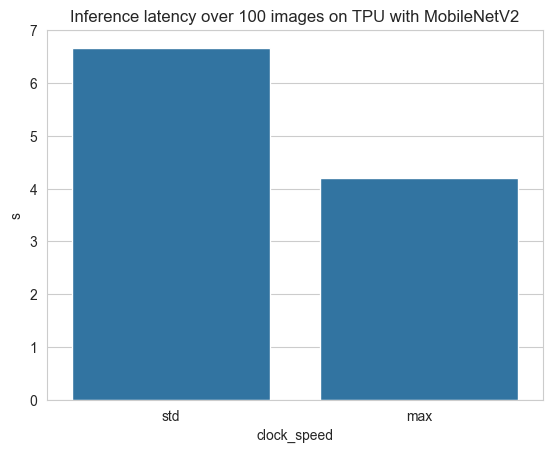

In [76]:
inspect_tpu_mnv2("time")

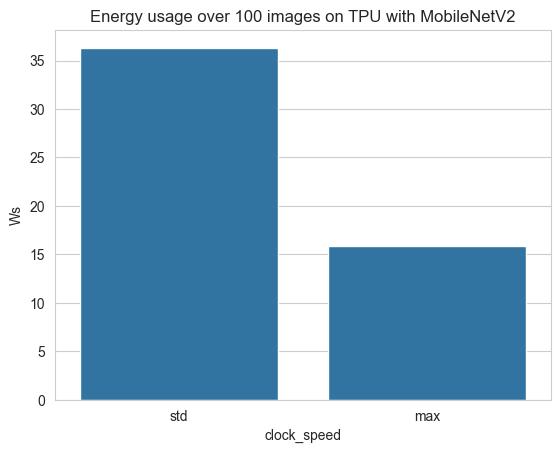

In [77]:
inspect_tpu_mnv2("energy")